In [97]:
%config IPCompleter.greedy=True

Available objects for config:
     AliasManager
     DisplayFormatter
     HistoryManager
     IPCompleter
     IPKernelApp
     InlineBackend
     LoggingMagics
     MagicsManager
     OSMagics
     PrefilterManager
     ScriptMagics
     StoreMagics
     ZMQInteractiveShell


In [85]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets
from ipywidgets import interact
from matplotlib.colors import LinearSegmentedColormap

$S_{w,b}(x)=\frac{1}{1+e^{-{w*x+b}}}$

In [4]:
def sigmoid(x,w,b):
    return 1/(1+np.exp(-(w*x+b)))

In [11]:
@interact(w=(-2,2,0.1), b=(-3,2,0.1))
def plot_sigmoid(w,b):
    X=np.linspace(-10,10,100)
    Y=sigmoid(X,w,b)
    plt.plot(X,Y)
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='w', max=2.0, min=-2.0), FloatSlider(value=-1.0, desc…

$S_{(w1,w2,b)}(X1,X2) = \frac{1}{1+e^{-(w1*X1+w1*X2+b)}}$

In [12]:
def sigmoid_3d(x2,x1,w1,w2,b):
    return 1/(1+np.exp(-(w1*x1+w2*x2+b)))

In [13]:
from mpl_toolkits import mplot3d

In [87]:
my_cmap = LinearSegmentedColormap.from_list("",["red","yellow","green"])

In [93]:
@interact(w1=(0,2,0.1),w2=(0,2,0.1),b=(0,5,0.1))
def plot_3d_sgmoid(w1,w2,b):
    X1=np.linspace(-10,10,100)
    X2=np.linspace(-10,10,100)
    XX1, XX2= np.meshgrid(X1, X2)
    Y=sigmoid_3d(XX1,XX2,w1,w2,b)
    plt.contourf(XX1, XX2, Y,cmap=my_cmap)
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='w1', max=2.0), FloatSlider(value=1.0, description='w…

In [96]:
@interact(w1=(-2,2,0.1),w2=(-2,2,0.1),b=(0,1,0.1))
def plot_3d_sgmoid(w1,w2,b):
    X1=np.linspace(-10,10,100)
    X2=np.linspace(-10,10,100)
    XX1, XX2= np.meshgrid(X1, X2)
    Y=sigmoid_3d(XX1,XX2,w1,w2,b)
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(XX1, XX2, Y, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
    ax.set_xlabel('XX1')
    ax.set_ylabel('XX2')
    ax.set_zlabel('Y')
    ax.view_init(30, 45)

interactive(children=(FloatSlider(value=0.0, description='w1', max=2.0, min=-2.0), FloatSlider(value=0.0, desc…

# Compute Loss of Data

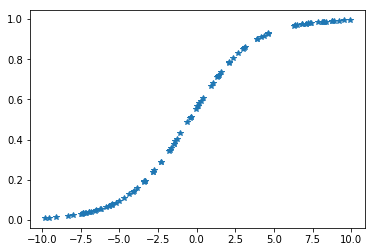

In [69]:
w_unknown=0.5
b_unknown=0.25
X= np.random.random(100)*20 -10
Y=sigmoid(X,w_unknown,b_unknown)
plt.plot(X,Y,"*")
plt.show()

In [70]:
def calculate_loss(X,Y,w_estimate,b_estimate):
    loss=0
    for x,y in zip(X,Y):
        loss+=(y-sigmoid(x,w_estimate,b_estimate))**2
    return loss

In [80]:
W=np.linspace(0,2,100)
B=np.linspace(-1,1,100)
WW,BB= np.meshgrid(W,B)
Loss = np.zeros(WW.shape)

In [81]:
import sys

In [82]:
minLoss = sys.maxsize
minI = 0
minJ = 0
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i,j] = calculate_loss(X, Y, WW[i,j], BB[i,j])
    if(minLoss > Loss[i,j]):
      minLoss = Loss[i,j]
      minI = i
      minJ = j

Text(0.5, 0, 'Loss')

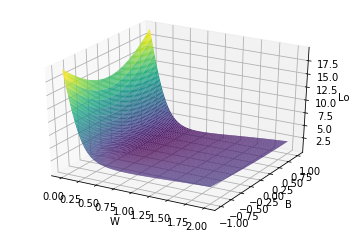

In [83]:

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('Loss')

In [84]:
ij = np.argmin(Loss)
i=int(np.floor(ij/Loss.shape[1]))
j = ij- i*Loss.shape[1]

# Sigmoid Neuron Class

In [122]:
class SigmoidNeuron:
    def __init__(self):
        w=None
        b=None
    def preceptron(self,x):
        return np.dot(self.w,x)+self.b
    def sigmoid(self,x):
        return 1.0/(1.0 + np.exp(-x))
    def grad_w(self,x,y):
        y_pred = self.sigmoid(self.preceptron(x))
        return (y_pred- y)* y_pred *(1-y_pred) *x
    def grad_b(self,x,y):
        y_pred = self.sigmoid(self.preceptron(x))
        return (y_pred- y)* y_pred *(1-y_pred)
    
    def fit(self,X,Y,epochs=1,learning_rate = 1 ,initialise=True):
        if initialise:
            self.w = np.random.randn(X.shape[1])
            self.b=0
            
        for i in range(epochs):
            dw,db=0,0
            for x,y in zip(X,Y):
                dw+= self.grad_w(x,y)
                db+=self.grad_b(x,y)
            self.w-= learning_rate *dw
            self.b -=learning_rate * db
            

# Fit For Toy Data

In [145]:
X= np.array([[2.5,2.5],[4,-1],[1,-4],[-2,-4],[-3,1.25],[1,5]])
Y=np.array([1,1,1,0,0,0])
sg = SigmoidNeuron()
sg.fit(X,Y)
print(sg.w, sg.b)


[-1.97719233  2.25455667] 0.13753940951306076


[-0.38347785  0.96889036] 0.03872621402860224


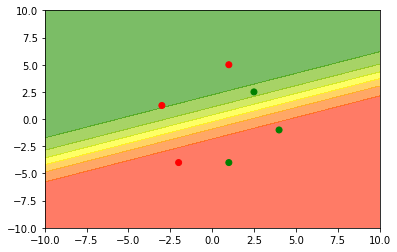

[0.02974808 0.82739541] 0.05766673909228964


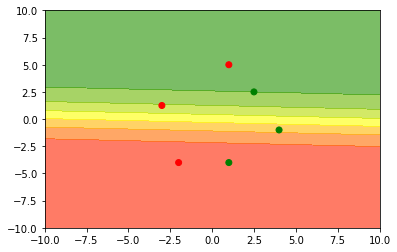

[0.83181768 0.44312539] 0.08286688262397446


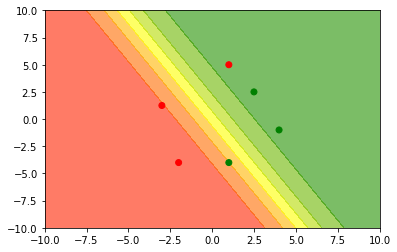

[ 0.95942721 -0.15227703] 0.15421554570916363


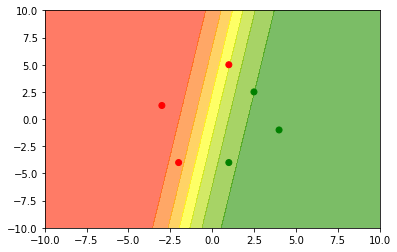

[ 0.95669176 -0.59852602] 0.034705938740553666


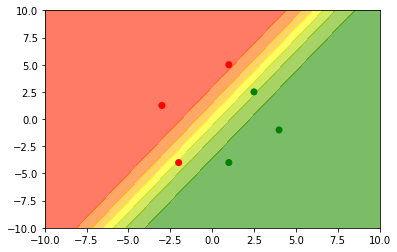

[ 1.2775489  -0.10192873] -0.041201901420868714


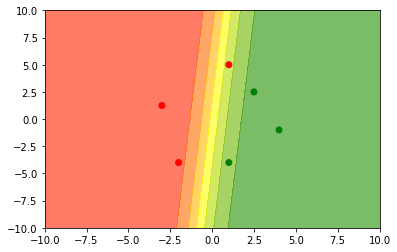

[ 1.2023187  -0.69125854] -0.1409155139446217


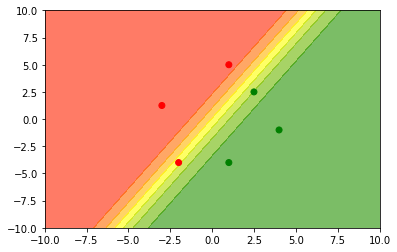

[ 1.48740965 -0.22191188] -0.2146847624062941


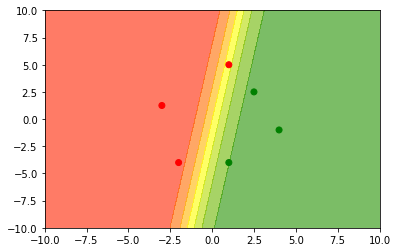

[ 1.40971371 -0.72726816] -0.3121167757009515


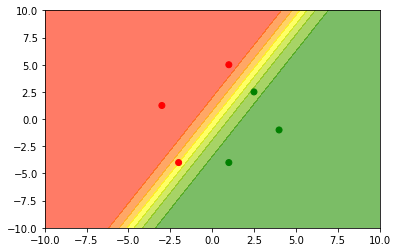

[ 1.63032151 -0.35812481] -0.3742134634731702


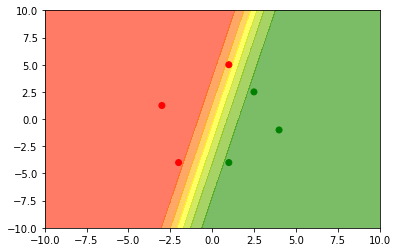

[ 1.58776915 -0.65977392] -0.4403223812502387


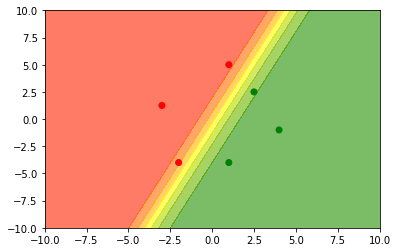

[ 1.69091366 -0.50610326] -0.47661440997641513


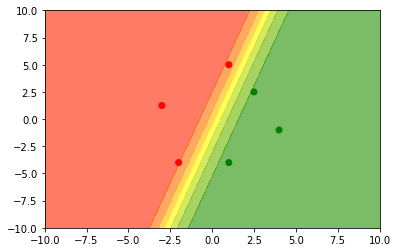

[ 1.70028917 -0.58310868] -0.5102109556661841


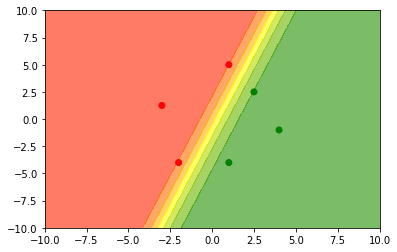

[ 1.7373002  -0.57092747] -0.536516390201867


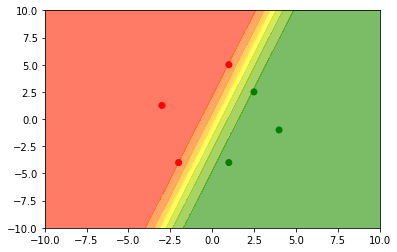

[ 1.76305351 -0.58434001] -0.5616821812617105


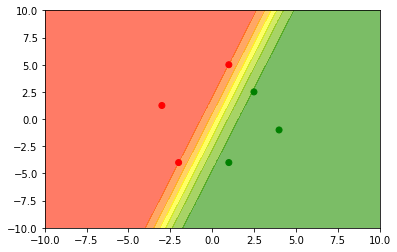

[ 1.78917346 -0.59179817] -0.5848794269580339


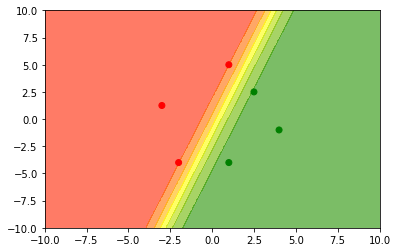

[ 1.81359968 -0.5996543 ] -0.6065831148674128


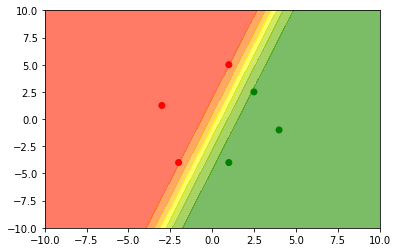

[ 1.83680203 -0.60703137] -0.6269264336739405


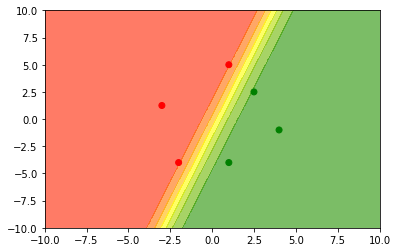

[ 1.85887104 -0.61405385] -0.6460588766219305


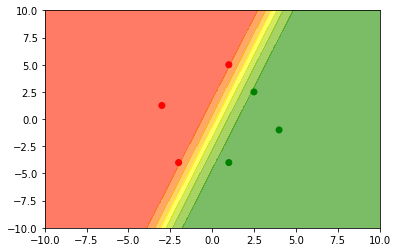

[ 1.87991266 -0.62075096] -0.6641047549154689


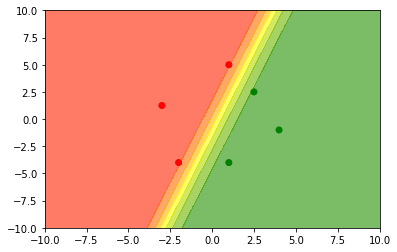

In [146]:
def plot_sig(X,Y,sn):
    X1=np.linspace(-10,10,100)
    X2=np.linspace(-10,10,100)
    XX1,XX2=np.meshgrid(X1,X2)
    YY=np.zeros(XX1.shape)
    for i in range(X2.size):
        for j in range(X1.size):
            val = np.array([X1[j],X2[i]])
            YY[i,j]=sn.sigmoid(sn.preceptron(val))
    plt.contourf(XX1,XX2,YY,cmap=my_cmap,alpha=0.6)
    plt.scatter(X[:,0],X[:,1],c=Y,cmap=my_cmap)
    plt.show()
sg.fit(X,Y,1,0.75,True)
for i in range(20):
    print(sg.w,sg.b)
    plot_sig(X,Y,sg)
    sg.fit(X,Y,1,0.75,False)

[ 1.0333642  -0.32224592] 0.023696511630723085
[ 1.11421132 -0.4200363 ] -0.07434685051516252
[ 1.24020731 -0.3372868 ] -0.15219884287558438
[ 1.25927667 -0.52946957] -0.22850158713901253
[ 1.40615152 -0.33945618] -0.28593832325758206
[ 1.38906529 -0.59749413] -0.3532278376191425
[ 1.52786498 -0.39725379] -0.3986357584678163
[ 1.51854464 -0.58375787] -0.44983938185564065
[ 1.60128619 -0.48694538] -0.48264535872401687
[ 1.61891776 -0.5536743 ] -0.5163281192035444
[ 1.66078276 -0.54151333] -0.5432989983431619
[ 1.68947934 -0.55872519] -0.5692687798709501
[ 1.71942343 -0.5663085 ] -0.5929397937723281
[ 1.74688428 -0.5754618 ] -0.6150730237861733
[ 1.77293969 -0.58376145] -0.6357459374388638
[ 1.79760278 -0.59166449] -0.6551401136667759
[ 1.82102541 -0.5991691 ] -0.67339068550332
[ 1.84332337 -0.60631534] -0.6906150785409745
[ 1.86459792 -0.61313547] -0.7069141320055782
[ 1.88493739 -0.61965763] -0.7223750973406944


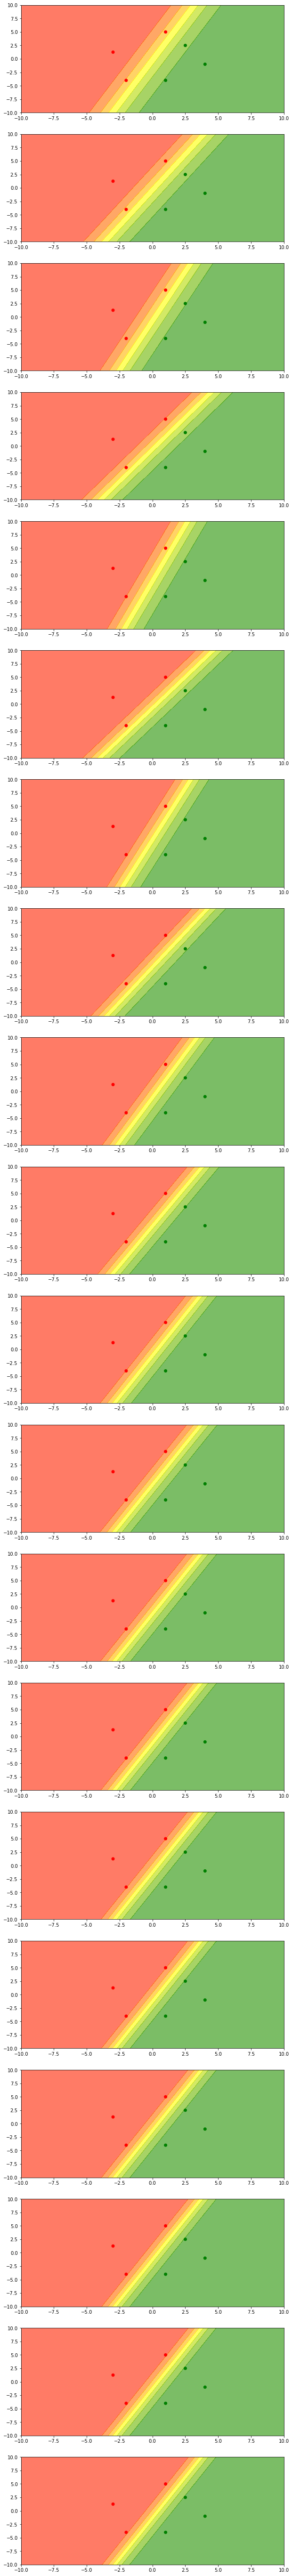

In [147]:

def plot_sig(X,Y,sn,ax):
    X1=np.linspace(-10,10,100)
    X2=np.linspace(-10,10,100)
    XX1,XX2=np.meshgrid(X1,X2)
    YY=np.zeros(XX1.shape)
    for i in range(X2.size):
        for j in range(X1.size):
            val = np.array([X1[j],X2[i]])
            YY[i,j]=sn.sigmoid(sn.preceptron(val))
    ax.contourf(XX1,XX2,YY,cmap=my_cmap,alpha=0.6)
    ax.scatter(X[:,0],X[:,1],c=Y,cmap=my_cmap)
    ax.plot()
    
sg.fit(X,Y,1,0.75,True)
N=20
plt.figure(figsize=(10,N*5))
for i in range(N):
    print(sg.w,sg.b)
    ax = plt.subplot(N,1,i+1)
    plot_sig(X,Y,sg,ax)
    sg.fit(X,Y,1,0.75,False)